Sampling Rate: 9.993ms


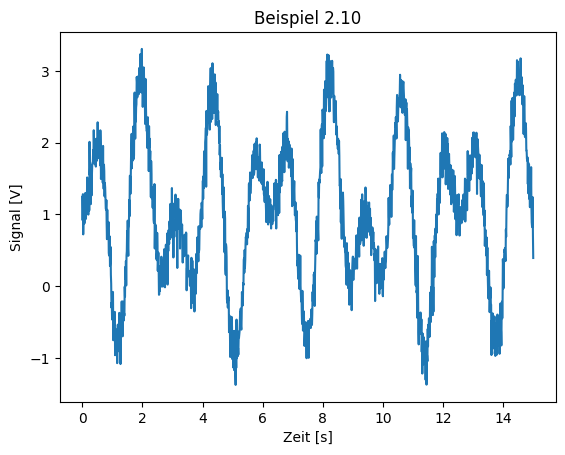

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import cholesky
from scipy.linalg import solve_triangular

# 1. load data
data = np.genfromtxt('data.txt')

t = data[:,0]
u = data[:,1]

# 2. sampling rate
sampling = (t[-1] - t[0])/len(t)
print(f"Sampling Rate: {sampling*1000:.4}ms")

# guessed carrier signal frequency: 0.5Hz

# visualize data
plt.plot(t, u)
plt.title("Beispiel 2.10")
plt.ylabel("Signal [V]")
plt.xlabel("Zeit [s]")
plt.show()

Dimension Normalengleichung: (11, 11)


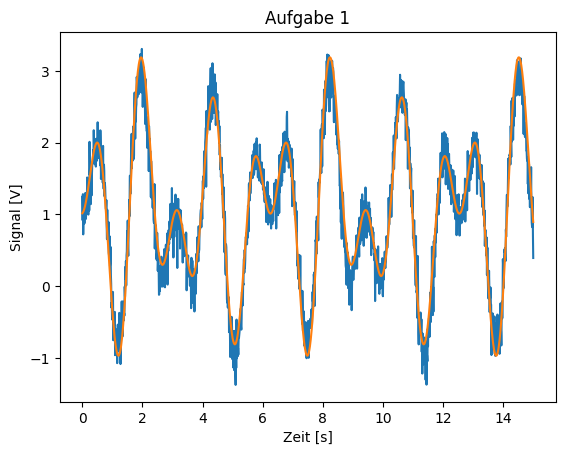

Quadratic Error: 86.97


In [26]:
# 3. dimension system matrix for fn: (1+2n)*(t)
# 4. calculate system matrix
def a0_coeff(t):
    return np.ones_like(t) * 0.5

def ak_coeff(w, k, t):
    return np.cos(w*k*t)

def bk_coeff(w, k, t):
    return np.sin(w*k*t)

def system_matrix(t, n, w):
    A = [a0_coeff(t)]

    for k in range(1, n+1):
        A = np.vstack((A, ak_coeff(w, k, t)))
        A = np.vstack((A, bk_coeff(w, k, t)))

    return A.T

# system matrix for f5 with w = 1:
fn = 5
w = 1
S = system_matrix(t, fn, w)

# 6. create solvable linear system of equations
# A^T * A * x = A^T * b
A = S.T@S
b = S.T@u
L = cholesky(A)
x = solve_triangular(L, b, lower=True) / np.diag(L)
uf = S@x

# 5. dimension normalengleichung
print(f"Dimension Normalengleichung: {A.shape}")

# 7. visualize data
plt.plot(t, u)
plt.plot(t, uf)
plt.title("Aufgabe 1")
plt.ylabel("Signal [V]")
plt.xlabel("Zeit [s]")
plt.show()


# 8 quadratic error sum
quadratic_error = np.sum(np.square(uf-u))
print(f"Quadratic Error: {quadratic_error:.4}")